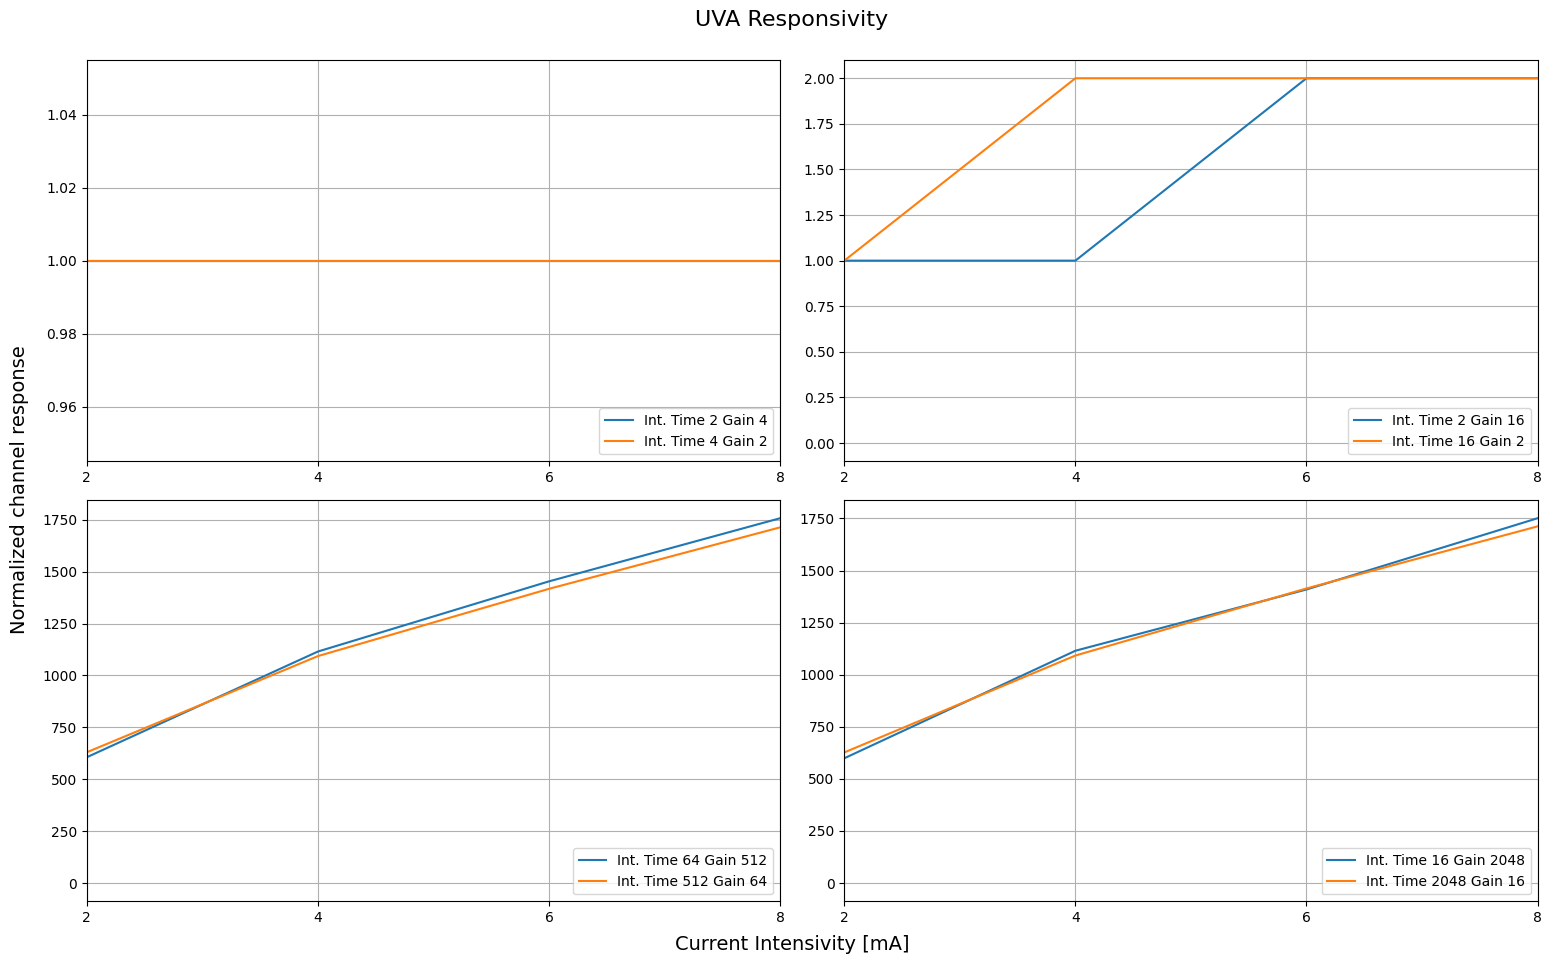

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv(r'sensor_parameter.csv')

# Function to create diagrams
def create_subplot(ax, data, int_time_gain_pairs):
    for int_time, gain in int_time_gain_pairs:
        filtered_data = data[(data['integration time'] == int_time) & (data['gain'] == gain)]
        ax.plot(filtered_data['current'], filtered_data['UVA'], label=f'Int. Time {int_time} Gain {gain}')
    ax.legend(loc='lower right', bbox_to_anchor=(1, 0))  
    ax.set_xticks([2, 4, 6, 8]) 
    ax.set_xlim(2, 8)  
    ax.grid(True)  

fig, axs = plt.subplots(2, 2, figsize=(17, 10))

create_subplot(axs[0, 0], data, [(2, 4), (4, 2)])         # first diagram
create_subplot(axs[0, 1], data, [(2, 16), (16, 2)])       # second
create_subplot(axs[1, 0], data, [(64, 512), (512, 64)])   # third
create_subplot(axs[1, 1], data, [(16, 2048), (2048, 16)]) # fourth

fig.suptitle('UVA Responsivity', fontsize=16)
fig.text(0.5, 0.04, 'Current Intensivity [mA]', ha='center', fontsize=14)
fig.text(0.04, 0.5, 'Normalized channel response', va='center', rotation='vertical', fontsize=14)

plt.tight_layout(rect=[0.05, 0.05, 0.95, 0.98])
plt.show()
